Name: 吳泓毅

Student ID: 0716050

Dec 2020

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression

## 1. Data Generation

#### 先利用uniform隨機產生1000個從-1.5到1.0的數值給x，並利用normal隨機產生符合常態分佈的數值給ϵ，最後在將x和ϵ帶入題目的equation算出y。
#### 將存放x和y的list組成一個dataframe方便model使用。
#### 利用scatterplot畫出產生的點。

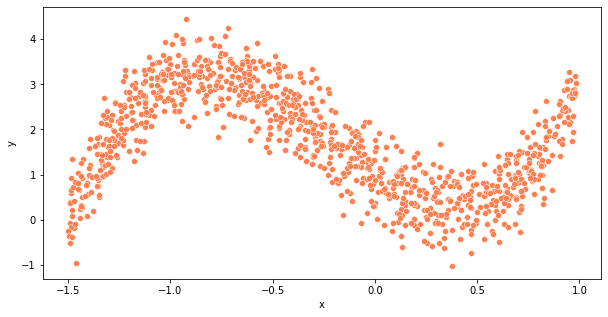

In [2]:
X = np.random.uniform(-1.5,1.0,1000)
y = []
eps = np.random.normal(0.0, 0.5, 1000)

for i in range(1000):
    y += [3 * pow(X[i], 3) + 2 * pow(X[i], 2) - 3 * X[i] + 1 + eps[i]]
    
d = {'x': X,'y': y}
df = pd.DataFrame(d)
# display(df)

plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'x', y = 'y', color = '#FF7F50')
plt.show()

## 2. Data Preprocessing 

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
X = X.reshape(-1,1)

#### 利用sklearn.preprocessing中PolynomialFeatures產生X的degree-K polynomial features
#### PolynomialFeatures()中的param為K

### K = 1

In [5]:
poly1 = PolynomialFeatures(1)
Xk1 = poly1.fit_transform(X)
print(Xk1)

[[ 1.          0.82377799]
 [ 1.         -1.32049862]
 [ 1.         -0.98822854]
 ...
 [ 1.          0.63974569]
 [ 1.         -1.11818064]
 [ 1.         -1.2342222 ]]


### K = 2

In [6]:
poly2 = PolynomialFeatures(2)
Xk2 = poly2.fit_transform(X)
print(Xk2)

[[ 1.          0.82377799  0.67861018]
 [ 1.         -1.32049862  1.7437166 ]
 [ 1.         -0.98822854  0.97659565]
 ...
 [ 1.          0.63974569  0.40927455]
 [ 1.         -1.11818064  1.25032794]
 [ 1.         -1.2342222   1.52330444]]


### K = 3

In [7]:
poly3 = PolynomialFeatures(3)
Xk3 = poly3.fit_transform(X)
print(Xk3)

[[ 1.          0.82377799  0.67861018  0.55902414]
 [ 1.         -1.32049862  1.7437166  -2.30257537]
 [ 1.         -0.98822854  0.97659565 -0.96509969]
 ...
 [ 1.          0.63974569  0.40927455  0.26183163]
 [ 1.         -1.11818064  1.25032794 -1.3980925 ]
 [ 1.         -1.2342222   1.52330444 -1.88009616]]


### K = 4

In [8]:
poly4 = PolynomialFeatures(4)
Xk4 = poly4.fit_transform(X)
print(Xk4)

[[ 1.          0.82377799  0.67861018  0.55902414  0.46051178]
 [ 1.         -1.32049862  1.7437166  -2.30257537  3.04054759]
 [ 1.         -0.98822854  0.97659565 -0.96509969  0.95373906]
 ...
 [ 1.          0.63974569  0.40927455  0.26183163  0.16750566]
 [ 1.         -1.11818064  1.25032794 -1.3980925   1.56331997]
 [ 1.         -1.2342222   1.52330444 -1.88009616  2.32045642]]


## 3. Model Construction

In [9]:
from sklearn.linear_model import LinearRegression

#### 利用sklearn.linear_model中的LinearRegression建立model，分別帶入不同的x的polynomial features，並利用score得到accuracy。

### K = 1

In [10]:
reg1 = LinearRegression().fit(Xk1, y)
r_sq1 = reg1.score(Xk1, y)
print('Accuracy:',r_sq1)

Accuracy: 0.1824270303266471


### K = 2

In [11]:
reg2 = LinearRegression().fit(Xk2, y)
r_sq2 = reg2.score(Xk2, y)
print('Accuracy:',r_sq2)

Accuracy: 0.20888703089068716


### K = 3

In [12]:
reg3 = LinearRegression().fit(Xk3, y)
r_sq3 = reg3.score(Xk3, y)
print('Accuracy:',r_sq3)

Accuracy: 0.8094752392220272


### K = 4

In [13]:
reg4 = LinearRegression().fit(Xk4, y)
r_sq4 = reg4.score(Xk4, y)
print('Accuracy:',r_sq4)

Accuracy: 0.8094930603683954


## 4. Results

#### 利用coef_得到fitted weights，利用inte_得到intercept。
#### X1_plot和y1_plot是用來畫下面的線

In [14]:
coef1 = reg1.coef_
inte1 = reg1.intercept_
print(coef1, inte1)

X1_plot = np.linspace(-1.5, 1.0)
y1_plot = inte1
for i in range(1, len(coef1)):
    y1_plot += coef1[i] * pow(X1_plot, i)

[ 0.         -0.66646213] 1.5461231586952566


In [15]:
coef2 = reg2.coef_
inte2 = reg2.intercept_
print(coef2, inte2)

X2_plot = np.linspace(-1.5, 1.0)
y2_plot = inte2
for i in range(1, len(coef2)):
    y2_plot += coef2[i] * pow(X2_plot, i)

[ 0.         -0.87434678 -0.39090164] 1.7190127602028689


In [16]:
coef3 = reg3.coef_
inte3 = reg3.intercept_
print(coef3, inte3)

X3_plot = np.linspace(-1.5, 1.0)
y3_plot = inte3
for i in range(1, len(coef3)):
    y3_plot += coef3[i] * pow(X3_plot, i)

[ 0.         -3.04334704  2.00558718  3.00288972] 1.0090988587519882


In [17]:
coef4 = reg4.coef_
inte4 = reg4.intercept_
print(coef4, inte4)

X4_plot = np.linspace(-1.5, 1.0)
y4_plot = inte4
for i in range(1, len(coef4)):
    y4_plot += coef4[i] * pow(X4_plot, i)

[ 0.         -3.05917929  1.98226926  3.02961069  0.0256004 ] 1.0119667994702146


#### 將四條線和原本的scatterplot一起顯示，並利用LaTex將四條線的equations列出來。
##### loc=1代表將 legend顯示在右上

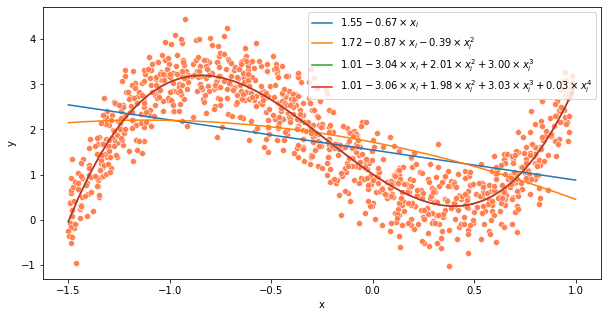

In [18]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'x', y = 'y', color = '#FF7F50')

plt.plot(X1_plot, y1_plot, label=r'$%.2f %+.2f \times x_i$' %(inte1,coef1[1]))
plt.plot(X2_plot, y2_plot, label=r'$%.2f %+.2f \times x_i %+.2f \times x_i^2$' %(inte2,coef2[1],coef2[2]))
plt.plot(X3_plot, y3_plot, label=r'$%.2f %+.2f \times x_i %+.2f \times x_i^2 %+.2f \times x_i^3$' %(inte3,coef3[1],coef3[2],coef3[3]))
plt.plot(X4_plot, y4_plot, label=r'$%.2f %+.2f \times x_i %+.2f \times x_i^2 %+.2f \times x_i^3 %+.2f \times x_i^4$' %(inte4,coef4[1],coef4[2],coef4[3], coef4[4]))

plt.legend(loc=1)

plt.show()

# Logistic Regression

## 1. Data Generation

#### 先利用ranint隨機產生0或1給y，在利用multivariate_normal得到x0和x1
#### 將存放x0、x1和y的list組成一個dataframe方便model使用。
#### 利用scatterplot畫出產生的點。

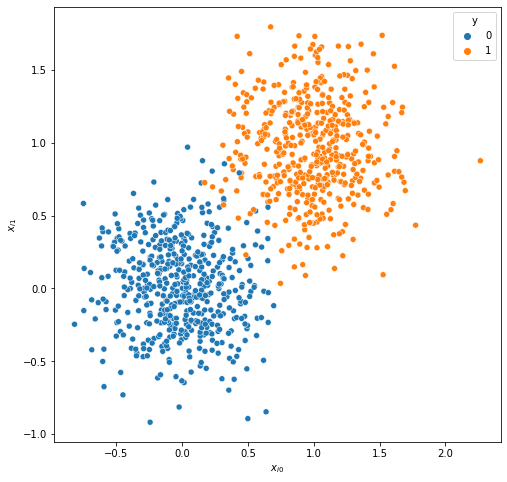

In [19]:
x0 = []
x1 = []

y = np.random.randint(2, size=1000)
cov = [[0.1, 0], [0, 0.1]]

for i in range(1000):
    mean = [y[i],y[i]]
    a, b = np.random.multivariate_normal(mean, cov, 1).T
    x0 += [a[0]]
    x1 += [b[0]]    

d = {'x0': x0, 'x1': x1, 'y': y}
df = pd.DataFrame(d)
# display(df)

plt.figure(figsize = (8, 8))
ax = sns.scatterplot(data = df, x = 'x0', y = 'x1', hue = 'y')
ax.set(xlabel=r'$x_{i0}$', ylabel=r'$x_{i1}$')
plt.show()

## 2. Model Construction

In [20]:
from sklearn.linear_model import LogisticRegression

#### 先將X和y產生，x0和x1是features，所以是X，y是target，所以是y。
#### 利用sklearn.linear_model中的LogisticRegression建立model。

In [21]:
X = df.iloc[:,:2]
y = df.iloc[:,2]
log = LogisticRegression(random_state=None).fit(X, y)

## 3. Results

### Accuracy

#### 利用score算出accuracy

In [22]:
l_sq = log.score(X, y)
print('Accuracy:',l_sq)

Accuracy: 0.986


### Weights & Corresponded Terms

#### 利用coef_得到fitted weights，利用inte_得到intercept。

In [23]:
coef = log.coef_
inte = log.intercept_
# print(coef, inte)
from IPython.display import display, Math
display(Math(r'y_i = L(%.1f %+.1f \times x_{i0} %+.1f \times x_{i1})' %(inte, coef[0][0], coef[0][1])))

<IPython.core.display.Math object>

### Decision Boundary

#### 利用colormap畫出decision boundaries

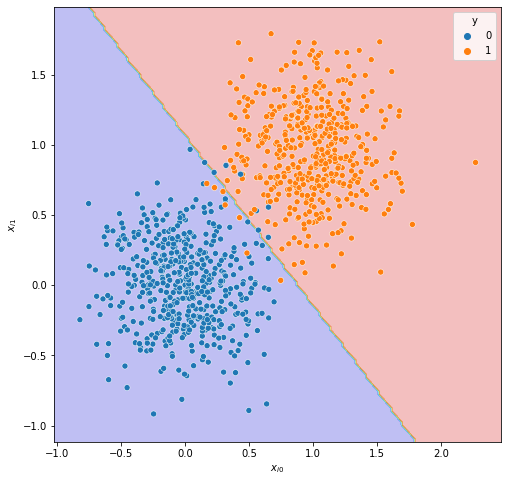

In [24]:
from matplotlib import cm
h = 0.02

#設定圖的範圍
x_min, x_max = X.iloc[:,0].min() - .2, X.iloc[:,0].max() + .2
y_min, y_max = X.iloc[:,1].min() - .2, X.iloc[:,1].max() + .2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = log.predict(np.c_[xx.ravel(), yy.ravel()])

#畫出decision的區塊
Z = Z.reshape(xx.shape)
plt.figure(figsize = (8, 8))
plt.contourf(xx, yy, Z, alpha=0.25, cmap=cm.jet)

#將原本的scatterplot和decision boundaries一起顯示
ax = sns.scatterplot(data = df, x = 'x0', y = 'x1', hue = 'y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set(xlabel=r'$x_{i0}$', ylabel=r'$x_{i1}$')
plt.show()